# DBSCAN 

Hands on! Another notebook??? Yes. More toy data? Yes!. Can you guess why? In real life, many datasets are not linearly separable, neither have clear shapes. Datasets for DBSCAN are hard to find, but it usually works great for spacial data. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("0",header=None,delim_whitespace=True)
df2 = pd.read_csv("33",header=None,delim_whitespace=True)
df3 = pd.read_csv("91",header=None,delim_whitespace=True)

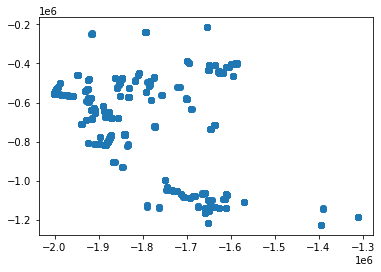

In [10]:
plt.scatter(df[0], df[1])
plt.show()

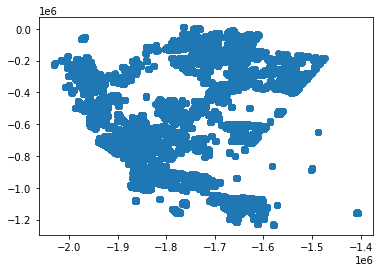

In [11]:
plt.scatter(df2[0], df2[1])
plt.show()

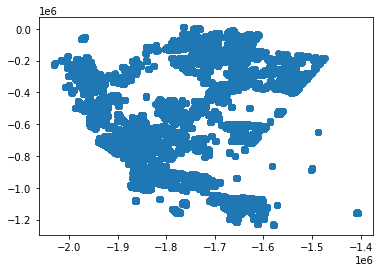

In [12]:
plt.scatter(df2[0], df2[1])
plt.show()

In [13]:
#Check the data, is there a need for any preprocessing?
X = df.to_numpy()
X2 = df2.to_numpy()
X3 = df3.to_numpy()

In [14]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.
clustering = DBSCAN(eps=100000, min_samples=3).fit(X)

In [15]:
clustering2 = DBSCAN(eps=100000, min_samples=3).fit(X2)

: 

: 

In [ ]:

clustering3 = DBSCAN(eps=100000, min_samples=3).fit(X3)

In [ ]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")


Estimated number of clusters: 7
Estimated number of noise points: 0
Silhouette Coefficient: 0.615


In [ ]:
labels2 = clustering2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_2 = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise_2 = list(labels2).count(-1)

print("Estimated number of clusters: %d" % n_clusters_2)
print("Estimated number of noise points: %d" % n_noise_2)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X2, labels2):.3f}")


In [ ]:
labels3 = clustering3.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_3 = len(set(labels3)) - (1 if -1 in labels3 else 0)
n_noise_3 = list(labels3).count(-1)

print("Estimated number of clusters: %d" % n_clusters_3)
print("Estimated number of noise points: %d" % n_noise_3)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X3, labels3):.3f}")


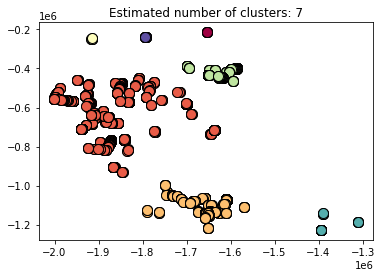

In [42]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [ ]:
#Plot clusters
unique_labels2 = set(labels2)
core_samples_mask2 = np.zeros_like(labels2, dtype=bool)
core_samples_mask2[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels2))]
for k, col in zip(unique_labels2, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels2 == k

    xy = X2[class_member_mask & core_samples_mask2]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X2[class_member_mask & ~core_samples_mask2]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_2}")
plt.show()

In [ ]:
#Plot clusters
unique_labels3 = set(labels3)
core_samples_mask3 = np.zeros_like(labels3, dtype=bool)
core_samples_mask3[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels3))]
for k, col in zip(unique_labels3, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels3 == k

    xy = X2[class_member_mask & core_samples_mask3]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X2[class_member_mask & ~core_samples_mask3]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_3}")
plt.show()

Nice! Now find the best $\epsilon$ and min_samples for this dataset.  
After that, repeat the process using the 91 and 33 files.